In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip
import random

In [187]:
# Neural network to train MNIST data

In [188]:
# Neural network class

class NeuralNetwork:
    # layers is a list containing the size of each layer
    def __init__(self, layers):
        self.layers = layers
        self.w = [None] * (len(layers) - 1)
        self.b = [None] * (len(layers) - 1)
        for i in range(len(layers) - 1):
            self.w[i] = np.random.normal(size=(layers[i], layers[i + 1]))
            self.b[i] = np.random.normal(size=(1, layers[i + 1]))
    # For training one batch of data
    def train(self, x, y):
        # Forward propagation
        z = [None] * len(self.layers)
        a = [None] * len(self.layers)
        a[0] = x
        for i in range(1, len(self.layers)):
            z[i] = a[i - 1].dot(self.w[i - 1]) + self.b[i - 1]
            a[i] = self.sigmoid(z[i])
        cost = ((a[len(self.layers) - 1] - y) ** 2 / 2).sum(axis=1).mean()
        # Backward propagation
        dz = [None] * len(self.layers)
        da = [None] * len(self.layers)
        dw = [None] * len(self.w)
        db = [None] * len(self.b)
        for i in range(len(self.layers) - 1, 0, -1):
            if i + 1 == len(self.layers):
                da[i] = a[i] - y
            else:
                da[i] = dz[i + 1].dot(self.w[i].T)
            dz[i] = da[i] * self.dsigmoid(z[i])
            dw[i - 1] = a[i - 1].T.dot(dz[i]) / len(x)
            db[i - 1] = dz[i].mean(axis=0)
        for i in range(len(self.w)):
            self.w[i] -= 3 * dw[i]
            self.b[i] -= 3 * db[i]
        count = 0
        for i in range(len(y)):
            if y[i][a[len(self.layers) - 1][i].argmax()]:
                count += 1
        return count
    
    @classmethod
    def sigmoid(cls, a):
        return 1 / (1 + np.exp(-a))
    
    @classmethod
    def dsigmoid(cls, a):
        return cls.sigmoid(a) * (1 - cls.sigmoid(a))

In [189]:
# Load data sets
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
f.close()

In [190]:
# Load X and Y
X = train_set[0]
Y = np.array([np.array(y) == range(10) for y in train_set[1]]).astype(int)

In [191]:
nn = NeuralNetwork([784, 30, 20, 10])

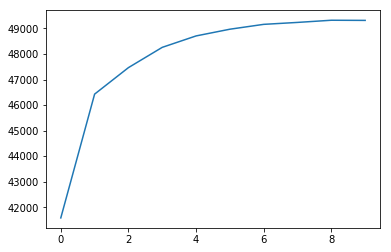

In [192]:
points = [0] * 10
batch_size = 10
for i in range(10):
    combined = list(zip(X, Y))
    random.shuffle(combined)
    X[:], Y[:] = zip(*combined)
    for j in range(0, len(X), batch_size):
        points[i] += nn.train(X[j:j+batch_size], Y[j:j+batch_size])
plt.plot(points)
plt.show()